## Linear Regression

### Tasks:
- How important are GRE scores?(Task details: GRE scores are obviously important, but how important? Is there a certain point where spending tens of hours to improve a few points not worth it?Use machine learning techniques to plot a curve: GRE score vs. chance of admission. Post the RMSE for the machine learning model used.)

- Predict Likelihood of Admission(Task details: Using the supplied predictive variables (GRE score, TOEFL score, University Rating, etc) to predict the likelihood of admission of a new candidate.)

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load the data
db = pd.read_csv('Admission_Predict.csv')
db.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# understanding the data
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
# description about the data
db.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
# drop the serial.no column
db.drop(['Serial No.'], inplace =True, axis =1)

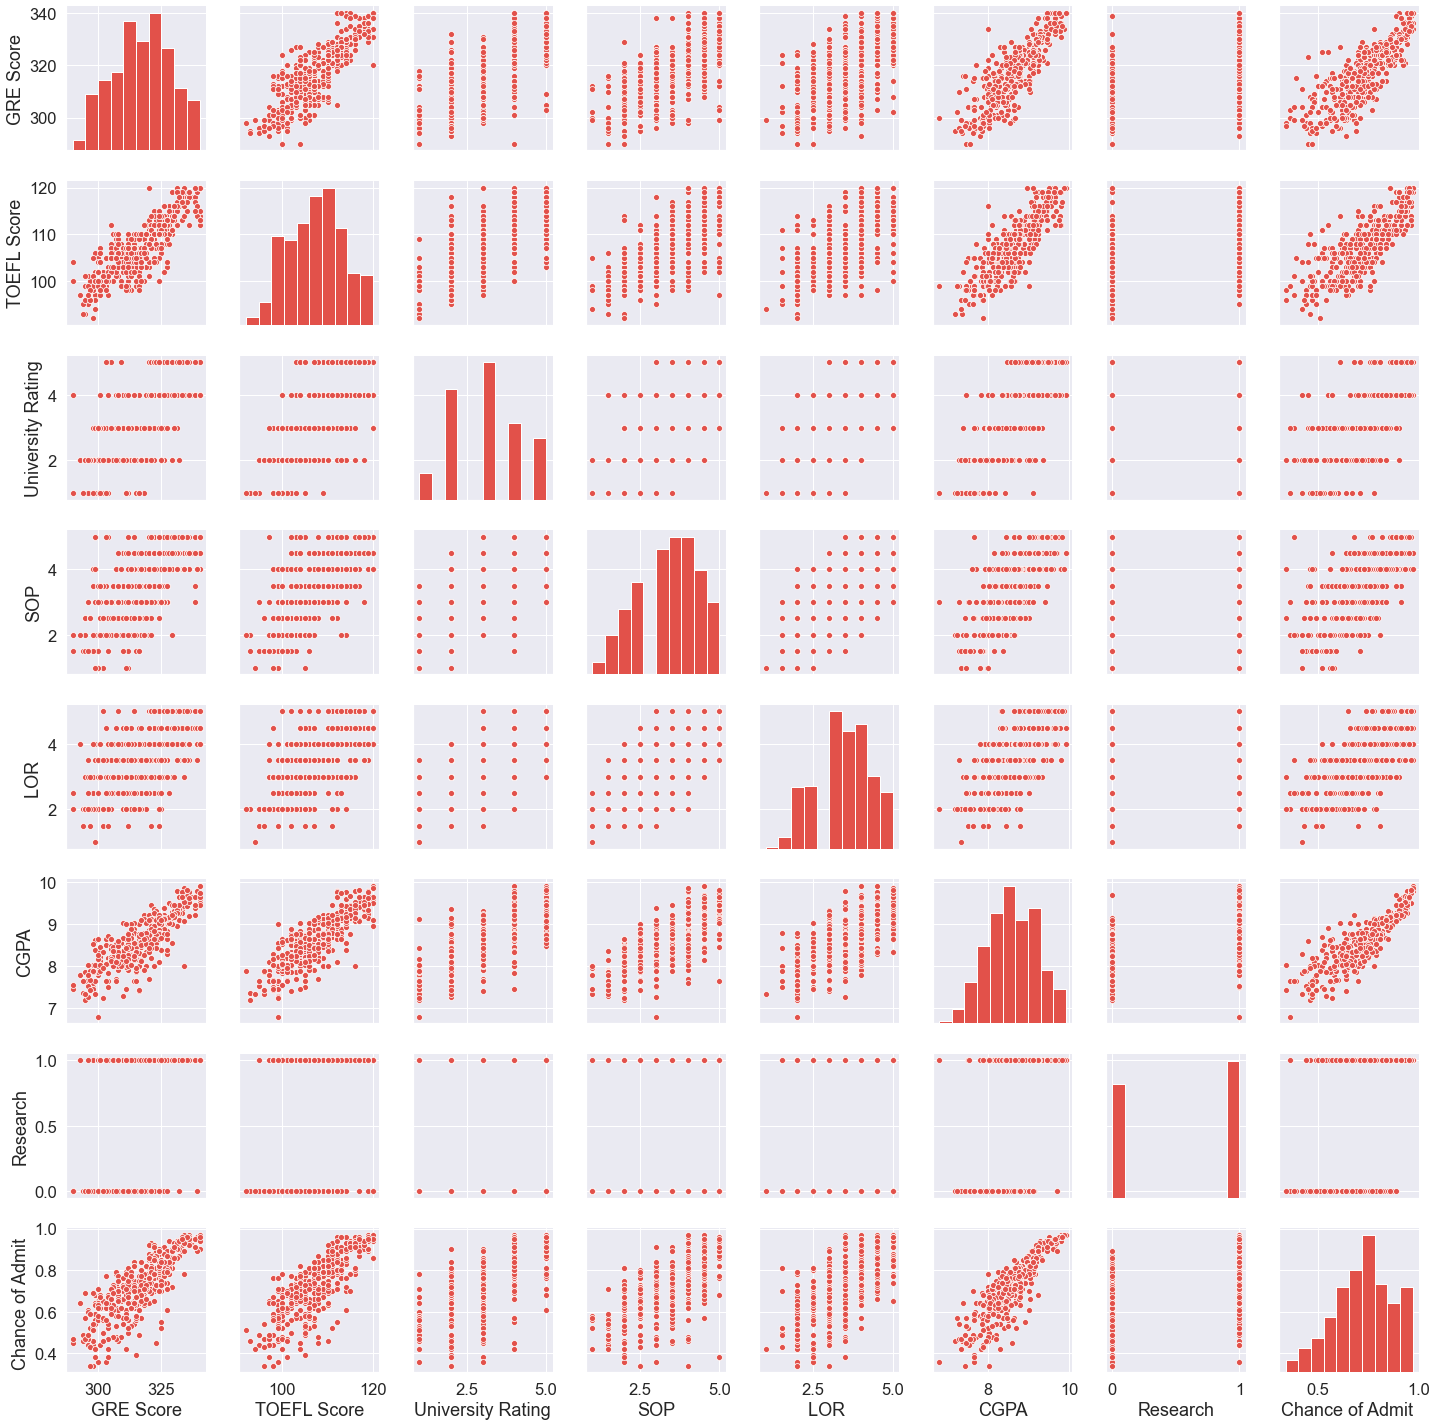

In [6]:
sns.pairplot(db)

## Assumptions of Linear Regression
- To check whether the data fullfills all the assumptions of Linear Regression or not 

#### 1. Linearity

##### Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable

In [7]:
db.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


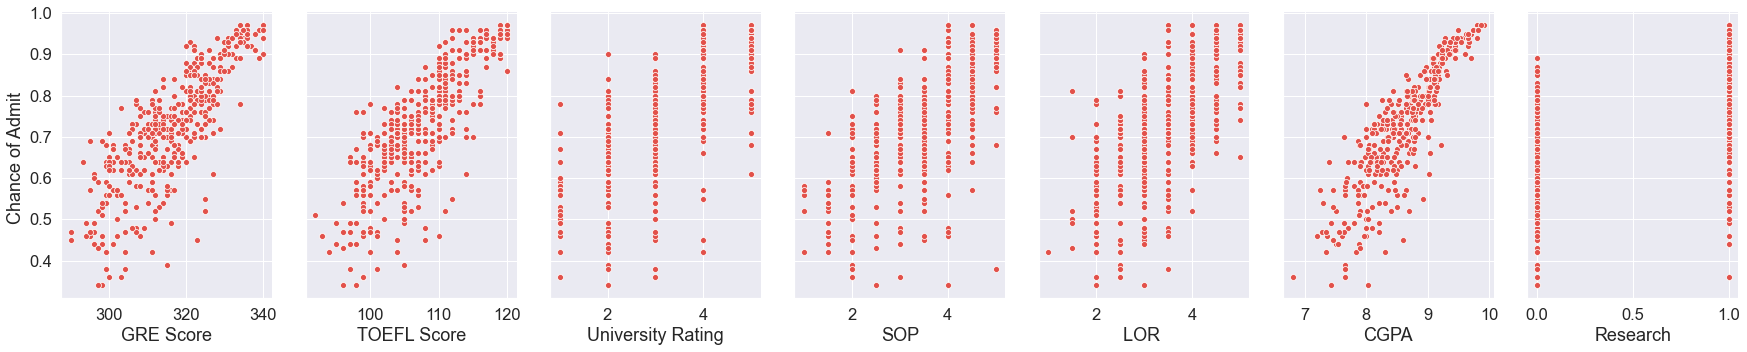

In [8]:
# plot between the features and responses using scatterplot
sns.pairplot(db, x_vars =['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'], y_vars=['Chance of Admit '], size = 5 , aspect = 0.7)

So here GRE Score, CGPA, and TOEFL Score has linear relationship with Chance of Admit

lets check for correlation in data

- dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
- Any na values are automatically excluded. 
- Any non-numeric data type columns in the dataframe is ignored.

In [9]:
db.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


now we can find correlations between x and y variabls . in x variabls we have independent variables and in y variable we have dependent variables. we can change this corr table into a graph usng seaborn heatmap for better visual understanding.

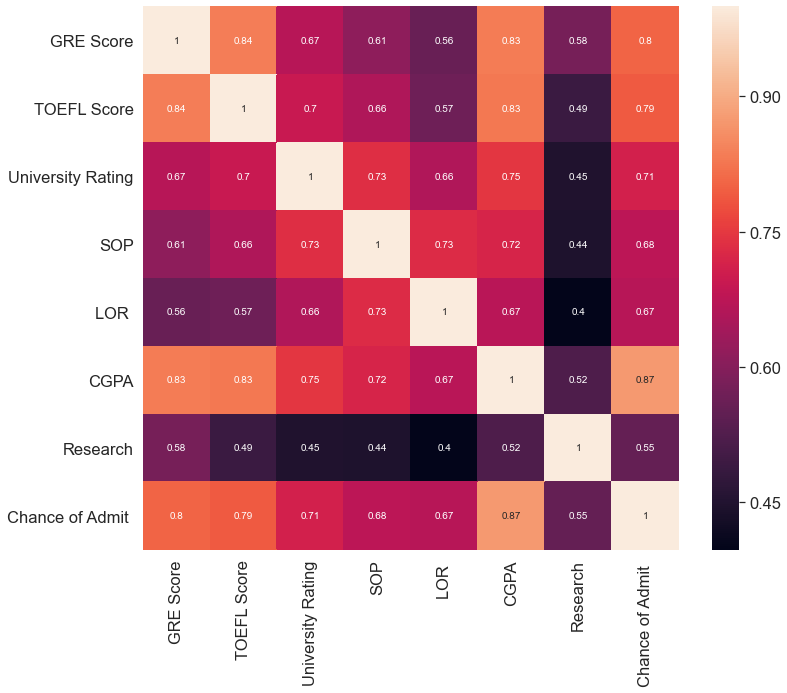

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(db.corr() , annot = True)

Setting the threshold as 0.75, we can see GRE Score, TOEFL Score, and CGPA are highly correlated with Chance of Admit, Lets use this to build our regression model

##### Now rest of the assumptions require us to perform the regression before we can even check for them. So let's perform regression on it.

In [11]:
#Now we can split our variables in 2 variables x and y :

#X = independent variables
#y = dependent variables</font>

#independent variables are [CGPA,GRE Score,TOEFL Score] we put these variables in X = [CGPA,GRE Score,TOEFL Score]
#dependent variable are [Chance of Admit] now we go to predict this variable so y = [Chance of Admit]

In [12]:
X = db[['CGPA', 'GRE Score', 'TOEFL Score']]
y =db['Chance of Admit ']

In [13]:
# lets divide the data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lr.coef_

array([0.13936386, 0.00222683, 0.00350793])

In [16]:
# our model is ready to predict y.
y_pred = lr.predict(X_test)

In [17]:
y_pred.shape , y_train.shape

((120,), (280,))

## Evaluating the performance of the model

In [18]:
from sklearn import metrics

metrics.mean_absolute_error(y_test , y_pred)

0.052890583743490635

In [19]:
print("R squared: {}".format(metrics.r2_score(y_true=y_test,y_pred=y_pred)))

R squared: 0.7675460466703042


In [20]:
# manual R2

RSS = np.sum((y_test - y_pred)**2)
mean = np.mean(y_test)
TSS = np.sum((y_test - mean)**2)

R2 = 1-(RSS/TSS)
R2

0.7675460466703042

In [21]:
coeff_regression_3=pd.DataFrame(lr.coef_ , X_train.columns ,)
coeff_regression_3

,0
CGPA,0.139364
GRE Score,0.002227
TOEFL Score,0.003508


So 76.75 % of Variance has been explained by our model

#### 2. Mean of Residuals

###### Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [22]:
mean_residuals = np.mean((y_test - y_pred)**2)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.005291400996077936


Very close to zero, so all good here

##### 3. Check for homoscadesticity
###### Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

##### Detecting heteroscedasticity!
- Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

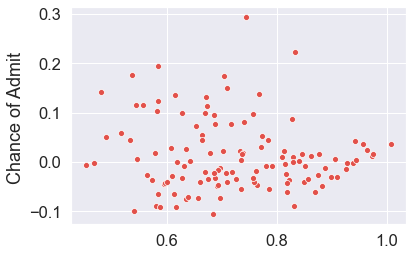

In [23]:
residuals = y_pred - y_test
p = sns.scatterplot(y_pred , residuals)

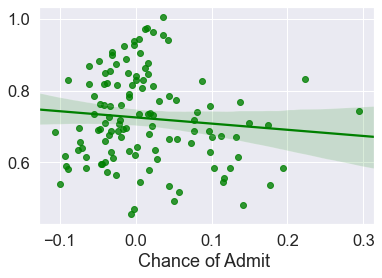

In [24]:
sns.regplot(x = residuals, y = y_pred, data = None, scatter = True, color = 'green')

Now we will be applying tests.
A tip is to keep in mind that if we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis. Remember, a researcher or data scientist would always aim to reject the null hypothesis.

#### Goldfeld Quandt Test

##### Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

- Null Hypothesis: Error terms are homoscedastic
- Alternative Hypothesis: Error terms are heteroscedastic.

In [25]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.8281457597724399), ('p-value', 0.7605847384615532)]

Here the p-value>0.05  So, we cannot reject the Null hypothesis, and hence say that Error terms are Homoscedastic

##### F-statistic insights
The F value in regression is the result of a test where the null hypothesis is that all of the regression coefficients are equal to zero. In other words, the model has no predictive capability. Basically, the f-test compares your model with zero predictor variables (the intercept only model), and decides whether your added coefficients improved the model. If you get a significant result, then whatever coefficients you included in your model improved the model’s fit.

Read your p-value first. If the p-value is small (less than your alpha level), you can reject the null hypothesis. Only then should you consider the f-value. If you don’t reject the null, ignore the f-value.

##### 4. Check for Normality of error terms/residuals

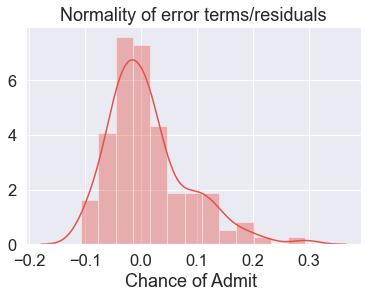

In [26]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms are pretty much normally distributed for the number of test points we took. It is centered around zero. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

##### KDE plot:
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

### Multicollinearity using VIF

In [27]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [28]:
X = db[['CGPA', 'GRE Score', 'TOEFL Score']]
calc_vif(X)

,variables,VIF
0,CGPA,714.459325
1,GRE Score,994.365812
2,TOEFL Score,1274.970487


In [29]:
X_all = db.drop(['Chance of Admit '], axis=1)
calc_vif(X_all)

,variables,VIF
0,GRE Score,1438.451789
1,TOEFL Score,1349.746948
2,University Rating,22.143705
3,SOP,38.050177
4,LOR,38.411722
5,CGPA,1080.491179
6,Research,2.859938


## No autocorrelation of residuals

When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.
In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.
There should not be autocorrelation in the data so the error terms should not form any pattern.¶

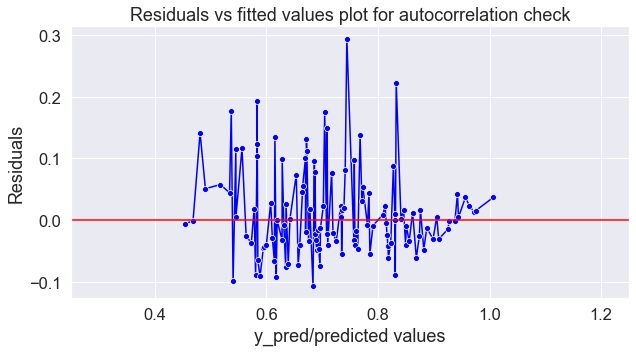

In [30]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
plt.xlim(0.25,1.25)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

##### Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.
- Null Hypothesis: Autocorrelation is absent.
- Alternative Hypothesis: Autocorrelation is present.

In [31]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.803664928625156

Since p value is greater than 0.05 we accept the null hypothesis that error terms are not autocorrelated.

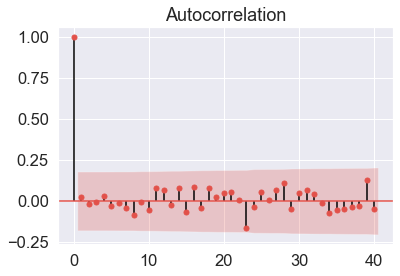

In [32]:
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

The results show partial no signs of autocorelation since there are No spikes outside the red confidence interval region. 

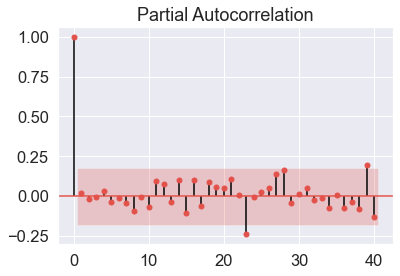

In [33]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

The results show partial signs or no signs of autocorelation since there are very few spikes outside the red confidence interval region. 

# Cross Validation 

## k-fold cross validation

###### Below are the steps for it:

- Randomly split your entire dataset into k”folds”
- For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
- Record the error you see on each of the predictions
- Repeat this until each of the k-folds has served as the test set
- The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model
- Below is the visualization of a k-fold validation when k=10

###### Now, one of most commonly asked questions is, “How to choose the right value of k?”.

Always remember, a lower value of k is more biased, and hence undesirable. On the other hand, a higher value of K is less biased, but can suffer from large variability. It is important to know that a smaller value of k always takes us towards validation set approach, whereas a higher value of k leads to LOOCV approach.

Precisely, LOOCV is equivalent to n-fold cross validation where n is the number of training examples.

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# create model
model = LinearRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1)
# report performance
print(np.mean(scores))

0.770320223429463


#### Cross validation using all the independent Variables

In [35]:
x_all_train, x_all_test , y_all_train, y_all_test = train_test_split(X_all , y , test_size = 0.3 , random_state =42)

In [36]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# create model
model_all = LinearRegression()
# evaluate model
scores = cross_val_score(model_all, x_all_train, y_all_train, cv=cv, n_jobs=-1)
# report performance
print(np.mean(scores))

0.7773186506156587


# Lasso Regression using lassocv

In [37]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

In [38]:
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [39]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

7.2240851554296994e-06

In [40]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=7.2240851554296994e-06, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
lasso_reg.score(X_test, y_test)

0.7675340933352582

In [42]:
coeff_lasso=pd.DataFrame(lasso_reg.coef_ , X_test.columns)
coeff_lasso

,0
CGPA,0.139290
GRE Score,0.002229
TOEFL Score,0.003510


score value decreases with only 3 variables, lets see our scores after including all the variables

In [43]:
# for all variables
lasscv_all = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv_all.fit(x_all_train, y_all_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [44]:
# best alpha parameter
alpha_all = lasscv_all.alpha_
alpha_all

4.432631664895725e-05

In [45]:
lasso_reg = Lasso(alpha_all)
lasso_reg.fit(x_all_train, y_all_train)

Lasso(alpha=4.432631664895725e-05, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
lasso_reg.score(x_all_test, y_all_test)

0.7954615778522071

In [47]:
coeff_lasso=pd.DataFrame(lasso_reg.coef_ , x_all_test.columns)
coeff_lasso

,0
GRE Score,0.001858
TOEFL Score,0.003188
University Rating,0.004869
SOP,0.000990
LOR,0.013722
CGPA,0.117340
Research,0.018180


# Ridge Regression Using ridgecv

In [48]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas_all = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas_all,cv=10,normalize = True)
ridgecv.fit(x_all_train, y_all_train)

RidgeCV(alphas=array([6.12139331, 2.38812066, 9.14938094, 4.82503183, 4.53755482,
       0.76830935, 5.82329395, 3.28034181, 2.63515028, 9.71453436,
       5.25378802, 7.11135117, 5.87365025, 5.13868695, 2.49190587,
       3.73520408, 3.14173045, 9.85597021, 3.63954092, 3.68641992,
       5.81174039, 1.04232149, 2.25339726, 8.37919172, 1.40783135,
       3.71601911, 1.70683987, 2.44519171, 1.09399739, 0.26244821,
       7.57061255, 0.4487919 , 3.17591405, 1.69254042, 1.88054253,
       1.4054231 , 6.75376807, 1.0735652 , 2.2557885 , 2.58874965,
       4.9023876 , 0.34788764, 6.52147416, 3.41942691, 4.10571052,
       3.79285829, 3.49593434, 5.34258127, 0.45766817, 0.86448854]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [49]:
ridgecv.alpha_

0.2624482120363958

In [50]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_all_train, y_all_train)

Ridge(alpha=0.2624482120363958, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
ridge_model.score(x_all_test, y_all_test)

0.7955380096241621

our r2_score for test data (79.55%) comes same as before using regularization. So, it is fair to say our Regression model did not overfit the data.

In [52]:
coeff_ridge=pd.DataFrame(ridge_model.coef_ , x_all_test.columns ,)
coeff_ridge

,0
GRE Score,0.001875
TOEFL Score,0.003209
University Rating,0.004967
SOP,0.001089
LOR,0.013860
CGPA,0.116255
Research,0.018304


# Elastic Net regression using elasticnetcv

In [53]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_all_train, y_all_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [54]:
elasticCV.alpha_

0.0025358775510204083

In [55]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [56]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_all_train, y_all_train)

ElasticNet(alpha=0.0025358775510204083, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [57]:
elasticnet_reg.score(x_all_test, y_all_test)

0.7901973745117591

In [58]:
coeff_elasticnet=pd.DataFrame(elasticnet_reg.coef_ , x_all_test.columns)
coeff_elasticnet

,0
GRE Score,0.002406
TOEFL Score,0.003703
University Rating,0.005073
SOP,0.000970
LOR,0.014701
CGPA,0.102300
Research,0.010907


So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

# Feature Scaling

#### Results after Scaling the features as we have features in different Scale

In [59]:
from sklearn.preprocessing import StandardScaler 

In [60]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X_all)

In [61]:
x_scaled_train,x_scaled_test,y_scaled_train,y_scaled_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [62]:
# Pure linear regression
lr.fit(x_scaled_train , y_scaled_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_scaled_pred = lr.predict(x_scaled_test)
y_scaled_pred.shape

(100,)

In [64]:
mse=metrics.mean_squared_error(y_scaled_test , y_scaled_pred)
mse

0.005817536656971207

In [65]:
r2Score = metrics.r2_score(y_scaled_test , y_scaled_pred)
r2Score

0.7204585720546246

###### here, we saw if we scale the data we get poorer results, lets find out the important features using tree based regressor , Random Forest Regressor

## Feature Importance using Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
classifier = RandomForestRegressor()
classifier.fit(X_all,y)
feature_names = X_all.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X_all.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [68]:
importance_frame

,Features,Importance
2,University Rating,0.011124
6,Research,0.013675
4,LOR,0.025460
3,SOP,0.031311
1,TOEFL Score,0.032050
0,GRE Score,0.063115
5,CGPA,0.823265


# Here, we see that 'CGPA' is the most important variable/feature followed by 'GRE Score' and 'TOEFL Score'

In [69]:
X_new = db[['GRE Score','CGPA']]
y_new =db['Chance of Admit ']

In [70]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new , test_size = 0.25, random_state = 42)

In [71]:
lr.fit(x_new_train, y_new_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
lr.coef_

array([0.00328401, 0.15201338])

In [73]:
y_new_pred = lr.predict(x_new_test)

In [74]:
mse_new = metrics.mean_squared_error(y_new_test, y_new_pred)
mse_new

0.005005598857198851

In [75]:
r2Score_new = metrics.r2_score(y_new_test, y_new_pred)
r2Score_new

0.7879539706662172

# Results:
- So we saw that Ridge Regression is giving us the best results with all the variables without Scaling
- By having only CGPA and GRE Score of a person we can predict the Chance of Admit to a college of a new candidate